In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

# tf.keras.backend.clear_session()


Mounted at /content/gdrive


# **Loading The Dataset**

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import cv2
from google.colab.patches import cv2_imshow

#*******************************************************************************
#*******************************************************************************
def read_images(data):
  lst_images = []
  for i in range(len(data)):
    img = cv2.imread(data[i]) 
    img = cv2.resize(img, (128, 128))     
    lst_images.append(img)
  return lst_images

#*******************************************************************************
#******************************************************************************* 

# Load The Dataset 
data_yes = glob("/content/gdrive/My Drive/hichem_data/brain_mri/yes*/*")
data_no  = glob("/content/gdrive/My Drive/hichem_data/brain_mri/no*/*")

lst_imgs_yes  = read_images(data_yes)
lst_imgs_no   = read_images(data_no)

print("Done ...")


Done ...


In [3]:
print(data_yes)


['/content/gdrive/My Drive/hichem_data/brain_mri/yes/Y29.jpg', '/content/gdrive/My Drive/hichem_data/brain_mri/yes/Y47.JPG', '/content/gdrive/My Drive/hichem_data/brain_mri/yes/Y102.jpg', '/content/gdrive/My Drive/hichem_data/brain_mri/yes/Y165.JPG', '/content/gdrive/My Drive/hichem_data/brain_mri/yes/Y82.jpg', '/content/gdrive/My Drive/hichem_data/brain_mri/yes/Y37.jpg', '/content/gdrive/My Drive/hichem_data/brain_mri/yes/Y168.jpg', '/content/gdrive/My Drive/hichem_data/brain_mri/yes/Y8.jpg', '/content/gdrive/My Drive/hichem_data/brain_mri/yes/Y255.JPG', '/content/gdrive/My Drive/hichem_data/brain_mri/yes/Y79.jpg', '/content/gdrive/My Drive/hichem_data/brain_mri/yes/Y77.jpg', '/content/gdrive/My Drive/hichem_data/brain_mri/yes/Y12.jpg', '/content/gdrive/My Drive/hichem_data/brain_mri/yes/Y170.JPG', '/content/gdrive/My Drive/hichem_data/brain_mri/yes/Y4.jpg', '/content/gdrive/My Drive/hichem_data/brain_mri/yes/Y3.jpg', '/content/gdrive/My Drive/hichem_data/brain_mri/yes/Y186.jpg', '/co

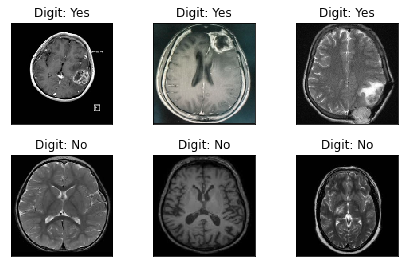

In [4]:
# Display some images
fig = plt.figure()
j = 0
for i in range(6):
  plt.subplot(2,3, i+1)
  plt.tight_layout()
  if i < 3 :    
    plt.imshow(lst_imgs_yes[i], cmap="gray", interpolation="none")
    plt.title("Digit: Yes")
  else:
    plt.imshow(lst_imgs_no[j], cmap="gray", interpolation="none")
    plt.title("Digit: No")
    j = j + 1
  plt.xticks([])
  plt.yticks([])


In [5]:
# Labels
labels_yes = [1] * len(lst_imgs_yes)
labels_no  = [0] * len(lst_imgs_no)

labels = labels_yes + labels_no
images = lst_imgs_yes + lst_imgs_no

print("Done ...")


Done ...


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


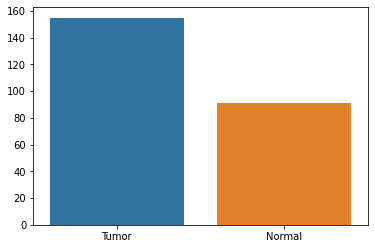

In [6]:
# Visualize the total number of labels of each type in data
import seaborn as sns

count=[len(labels_yes), len(labels_no)]
label=["Tumor","Normal"]

sns.barplot(label,count)


# **Normal CNN**

In [10]:
# Scale the pixel intensities down to the [0,1] range by dividing them by 255.0 
# (this also converts them to floats).
Y = np.asarray(labels)
X = np.asarray(images)

my_data = X.astype("float32")  
my_data = my_data / 255.0

#*******************************************************************************
# Split data into train and test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(my_data, Y, 
                                test_size= 0.20, random_state=100)
print("X_train : ",X_train.shape,"  X_test : ",X_test.shape)


X_train :  (196, 128, 128, 3)   X_test :  (50, 128, 128, 3)


In [7]:
# Creating the model using the Sequential API

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=64, kernel_size=7, strides=1, 
                  padding="same", activation="relu", input_shape= (128,128,3)))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Conv2D(filters=128, kernel_size=5, strides=1, 
                  padding="same", activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Conv2D(filters=256, kernel_size=3, strides=1, 
                  padding="same", activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation="relu"))
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(1,   activation="sigmoid"))

# The model’s summary() method displays all the model’s layers
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      9472      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 128)       204928    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 65536)             0

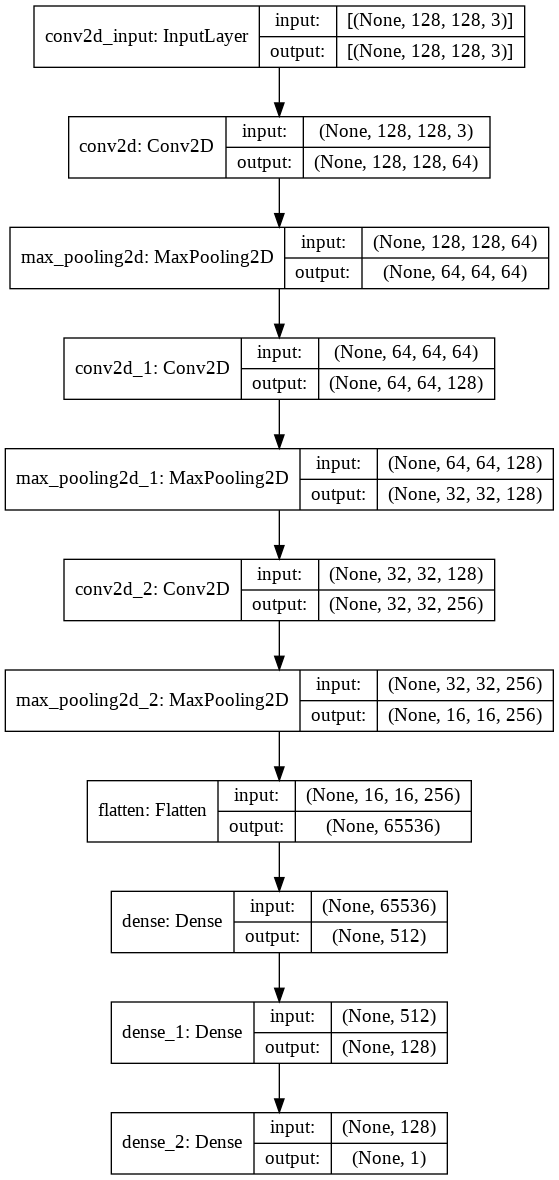

In [8]:
# Plot the model
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)


In [11]:
# Compiling the model
model.compile(loss="binary_crossentropy", optimizer= "sgd", metrics=["accuracy"])

# Training the model 
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))
# history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)


Epoch 1/100
4/4 [==============================] - 35s 591ms/step - loss: 0.6687 - accuracy: 0.6327 - val_loss: 0.6522 - val_accuracy: 0.5600
Epoch 2/100
4/4 [==============================] - 0s 78ms/step - loss: 0.6177 - accuracy: 0.6480 - val_loss: 0.6471 - val_accuracy: 0.5600
Epoch 3/100
4/4 [==============================] - 0s 77ms/step - loss: 0.6028 - accuracy: 0.6480 - val_loss: 0.6380 - val_accuracy: 0.5600
Epoch 4/100
4/4 [==============================] - 0s 76ms/step - loss: 0.5853 - accuracy: 0.6480 - val_loss: 0.6138 - val_accuracy: 0.6200
Epoch 5/100
4/4 [==============================] - 0s 76ms/step - loss: 0.5670 - accuracy: 0.6837 - val_loss: 0.6036 - val_accuracy: 0.6800
Epoch 6/100
4/4 [==============================] - 0s 78ms/step - loss: 0.5534 - accuracy: 0.6990 - val_loss: 0.6274 - val_accuracy: 0.5600
Epoch 7/100
4/4 [==============================] - 0s 74ms/step - loss: 0.5543 - accuracy: 0.7143 - val_loss: 0.5836 - val_accuracy: 0.7800
Epoch 8/100
4/4 [=

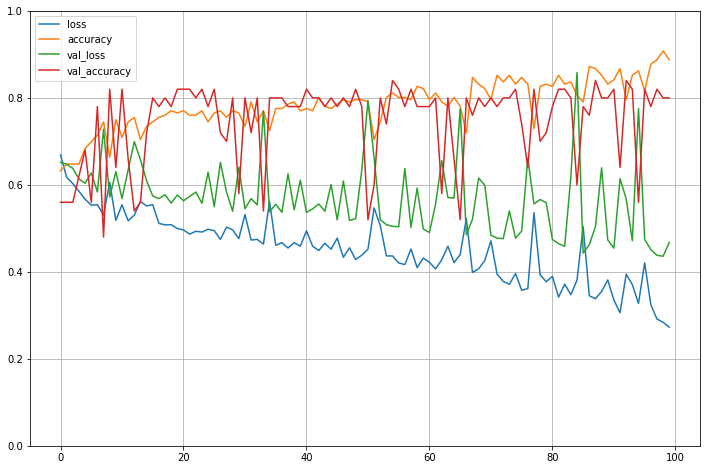

2/2 [==============================] - 1s 452ms/step - loss: 0.4677 - accuracy: 0.8000
Loss     :  0.4677177667617798
accuracy :  0.800000011920929


In [12]:
# plot the learning curves
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# Evaluate the model
model_evaluate = model.evaluate(X_test, y_test)
print("Loss     : ",model_evaluate[0])
print("accuracy : ",model_evaluate[1])


Classification report : 
               precision    recall  f1-score   support

           0       0.88      0.64      0.74        22
           1       0.76      0.93      0.84        28

    accuracy                           0.80        50
   macro avg       0.82      0.78      0.79        50
weighted avg       0.81      0.80      0.79        50

Confusion matrix : 



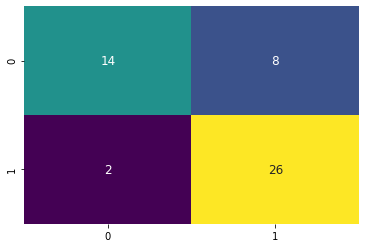

Normalized confusion matrix : 



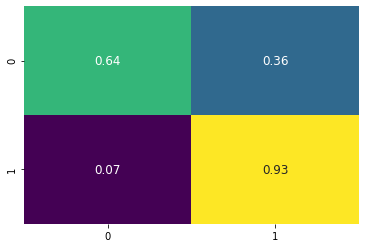

In [13]:
# Confusion Matrix
y_pred = (model.predict(X_test) > 0.5).astype("int32").tolist()

class_names = ["0", "1"]

# Compute classification report
from sklearn.metrics import classification_report, confusion_matrix
print("Classification report : \n",classification_report(y_test, y_pred, target_names = class_names))

# Function to draw confusion matrix
import seaborn as sns
def draw_confusion_matrix(true, preds, normalize=None):
  # Compute confusion matrix
  conf_matx = confusion_matrix(true, preds, normalize = normalize)
  conf_matx = np.round(conf_matx, 2)
  # print(conf_matx)

  # plt.subplots(figsize=(14,8))
  sns.heatmap(conf_matx, annot=True, annot_kws={"size": 12},fmt="g", cbar=False, cmap="viridis")
  plt.show()

print("Confusion matrix : \n")
draw_confusion_matrix(y_test, y_pred)

print("Normalized confusion matrix : \n")
draw_confusion_matrix(y_test, y_pred,"true")


# Make predictions
# predicted = model.predict(X_new)

# Save the model
# model.save("/content/my_model.h5")


# **Avoiding Overfitting**

In [ ]:
Y = np.asarray(labels)
X = np.asarray(images)

my_data = X.astype("float32")  
my_data = my_data / 255.0

# Split data into train and test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(my_data, Y, 
                                test_size= 0.20, random_state=100)

print("X_train : ",X_train.shape,"  X_test : ",X_test.shape)


X_train :  (196, 128, 128, 3)   X_test :  (50, 128, 128, 3)


In [ ]:
"""
Image Augmentation
We will use Image Augmentation to train the model on different types 
of combination formed by rotation ,flipping of image so as to increase 
our model accuracy
"""
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 1,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.15, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip =True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        shear_range=0.1
)

datagen.fit(X_train)

print("Done ...")


Done ...


In [ ]:
# Creating the model using the Sequential API

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=64, kernel_size=7, strides=1, 
                  padding="same", activation="selu", input_shape= (128,128,3)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.LeakyReLU(alpha=0.2))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.GaussianNoise(0.1))

model.add(keras.layers.Conv2D(filters=64, kernel_size=5, strides=1, 
                  padding="same", activation="selu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.LeakyReLU(alpha=0.2))
model.add(keras.layers.MaxPool2D(pool_size=2))

model.add(keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, 
                  padding="same", activation="selu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.LeakyReLU(alpha=0.2))
model.add(keras.layers.MaxPool2D(pool_size=2))

model.add(keras.layers.Conv2D(filters=256, kernel_size=3, strides=1, 
                  padding="same", activation="selu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.LeakyReLU(alpha=0.2))
model.add(keras.layers.MaxPool2D(pool_size=2))

model.add(keras.layers.Conv2D(filters=512, kernel_size=3, strides=1, 
                  padding="same", activation="selu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.LeakyReLU(alpha=0.2))
model.add(keras.layers.MaxPool2D(pool_size=2))

model.add(keras.layers.Conv2D(filters=1024, kernel_size=3, strides=1, 
                  padding="same", activation="selu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.LeakyReLU(alpha=0.2))
model.add(keras.layers.MaxPool2D(pool_size=2))


model.add(keras.layers.Flatten())
layer0 = keras.layers.Dense(512, activation="selu",kernel_initializer="he_normal",  
                                kernel_regularizer=keras.regularizers.l2(0.01))
layer1 = keras.layers.Dense(128, activation="selu",kernel_initializer="he_normal",  
                                kernel_regularizer=keras.regularizers.l2(0.01))
layer_output = keras.layers.Dense(1, activation="sigmoid", kernel_initializer="glorot_uniform")

model.add(layer0)
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.LeakyReLU(alpha=0.2))
model.add(layer1)
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.LeakyReLU(alpha=0.2))
model.add(layer_output)

# The model’s summary() method displays all the model’s layers
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 128, 128, 64)      9472      
_________________________________________________________________
batch_normalization_16 (Batc (None, 128, 128, 64)      256       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 128, 128, 64)      0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
gaussian_noise (GaussianNois (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 64, 64, 64)        102464    
_________________________________________________________________
batch_normalization_17 (Batc (None, 64, 64, 64)       

In [ ]:
EPOCHS = 200
BS = 64

# Compiling the model
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, clipvalue=1.0)
# optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True, clipvalue=1.0)

model.compile(loss="binary_crossentropy", optimizer= optimizer, metrics=["accuracy"])

# Learning rate scheduling
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.0001, patience=2,
                                      monitor="val_accuracy", min_lr=0.00001)

# Interrupts training when it measures no progress on the validation set
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20, monitor = "val_loss",
                                                  restore_best_weights=True)
from sklearn.utils import class_weight

# Class weight
class_weights = class_weight.compute_class_weight("balanced",
                                                 np.unique(y_train),
                                                 y_train)
class_weights = dict(enumerate(class_weights))

# Training the model
history = model.fit(datagen.flow(X_train,y_train, batch_size = BS), 
                    steps_per_epoch=len(X_train) // BS,
                    epochs= EPOCHS,
                    class_weight   = class_weights,  
                    validation_data=datagen.flow(X_test, y_test),  
                    callbacks=[lr_scheduler, early_stopping_cb] )


Epoch 1/200
3/3 [==============================] - 5s 855ms/step - loss: 13.3718 - accuracy: 0.6667 - val_loss: 12.9238 - val_accuracy: 0.5600
Epoch 2/200
3/3 [==============================] - 1s 290ms/step - loss: 12.8236 - accuracy: 0.5909 - val_loss: 14.4046 - val_accuracy: 0.5600
Epoch 3/200
3/3 [==============================] - 1s 291ms/step - loss: 11.9579 - accuracy: 0.6818 - val_loss: 15.6803 - val_accuracy: 0.5600
Epoch 4/200
3/3 [==============================] - 1s 341ms/step - loss: 11.5326 - accuracy: 0.6771 - val_loss: 14.0955 - val_accuracy: 0.5600
Epoch 5/200
3/3 [==============================] - 1s 290ms/step - loss: 11.5079 - accuracy: 0.7045 - val_loss: 13.2652 - val_accuracy: 0.5600
Epoch 6/200
3/3 [==============================] - 1s 432ms/step - loss: 11.4693 - accuracy: 0.6970 - val_loss: 12.5958 - val_accuracy: 0.5600
Epoch 7/200
3/3 [==============================] - 1s 282ms/step - loss: 11.4268 - accuracy: 0.7500 - val_loss: 12.2166 - val_accuracy: 0.5600

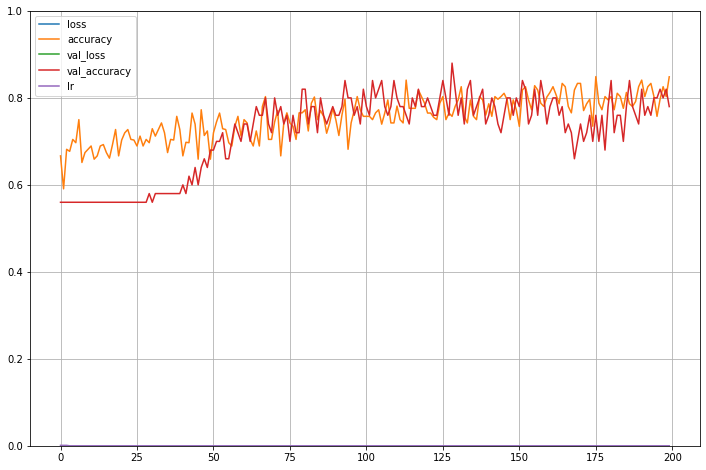

2/2 [==============================] - 0s 21ms/step - loss: 9.7987 - accuracy: 0.7800
Loss     :  9.798654556274414
accuracy :  0.7799999713897705


In [ ]:
# plot the learning curves
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# Evaluate the model
model_evaluate = model.evaluate(X_test, y_test)
print("Loss     : ",model_evaluate[0])
print("accuracy : ",model_evaluate[1])


Classification report : 
               precision    recall  f1-score   support

           0       0.70      0.86      0.78        22
           1       0.87      0.71      0.78        28

    accuracy                           0.78        50
   macro avg       0.79      0.79      0.78        50
weighted avg       0.80      0.78      0.78        50

Confusion matrix : 



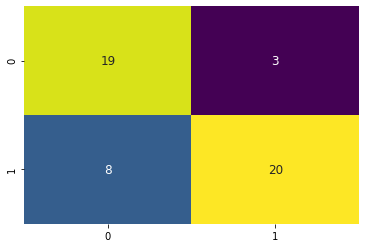

Normalized confusion matrix : 



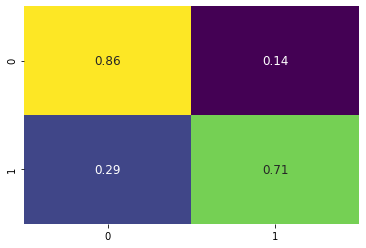

In [ ]:
# Confusion Matrix
y_pred = (model.predict(X_test) > 0.5).astype("int32").tolist()

class_names = ["0", "1"]

# Compute classification report
from sklearn.metrics import classification_report, confusion_matrix
print("Classification report : \n",classification_report(y_test, y_pred, target_names = class_names))

# Function to draw confusion matrix
import seaborn as sns
def draw_confusion_matrix(true, preds, normalize=None):
  # Compute confusion matrix
  conf_matx = confusion_matrix(true, preds, normalize = normalize)
  conf_matx = np.round(conf_matx, 2)
  # print(conf_matx)

  # plt.subplots(figsize=(14,8))
  sns.heatmap(conf_matx, annot=True, annot_kws={"size": 12},fmt="g", cbar=False, cmap="viridis")
  plt.show()

print("Confusion matrix : \n")
draw_confusion_matrix(y_test, y_pred)

print("Normalized confusion matrix : \n")
draw_confusion_matrix(y_test, y_pred,"true")


# Make predictions
# predicted = model.predict(X_new)

# Save the model
# model.save("/content/my_model.h5")


# **Inference**

In [ ]:
!pip install gradio

     |████████████████████████████████| 1.6MB 8.1MB/s 
     |████████████████████████████████| 215kB 56.1MB/s 
     |████████████████████████████████| 1.9MB 45.2MB/s 
     |████████████████████████████████| 962kB 46.6MB/s 
     |████████████████████████████████| 71kB 12.1MB/s 
     |████████████████████████████████| 3.2MB 49.3MB/s 
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-cp37-none-any.whl size=3372 sha256=f5a969b3a2bf11c730b7853c3064a1ca05c1ae6fa21d9d657c8259703436b145
  Stored in directory: /root/.cache/pip/wheels/9f/fc/a7/ab5712c3ace9a8f97276465cc2937316ab8063c1fea488ea77
  Created wheel for ffmpy: filename=ffmpy-0.3.0-cp37-none-any.whl size=4710 sha256=bc9f1417f75904fb81f0306c070fedcc7ee11ff552ffdec13940beee1de1dc37
  Stored in directory: /root/.cache/pip/wheels/cc/ac/c4/bef572cb7e52bfca170046f567e64858632daf77e0f34e5a74
Successfully built flask-cachebuster ffmpy


In [ ]:
img = cv2.imread("/content/img23.jpg")
H,W,C = 128,128,3
img = cv2.resize(img, (H, W)) 
img = np.array(img)
img = img.astype("float32")  
img = img / 255.0
img = img.reshape(1,H,W,C)
prediction = model.predict(img).flatten()
# prediction = (model.predict(img) > 0.5).astype("int32").flatten()
print(prediction)

[0.8527712]


In [ ]:
# https://www.gradio.app/ml_examples

import tensorflow as tf
from tensorflow import keras
import numpy as np
import gradio as gr
import requests
#from PIL import Image
import cv2

def inference(img):
    labels =["Tumor","Normal"]
    H,W,C = 128,128,3
    img = cv2.resize(img, (H, W)) 
    img = np.array(img)
    img = img.astype("float32")/255.0
    img = img.reshape(1,H,W,C)
    pred = model.predict(img).flatten()
    prediction = [pred[0], 1-pred[0]]
    dictionary = dict(zip(labels, map(float, prediction)))
    return dictionary


nbr_top_classes = 2
gr.Interface(fn=inference, 
             inputs=gr.inputs.Image(), 
             outputs=gr.outputs.Label(num_top_classes=nbr_top_classes)).launch(share=True) #, debug=True Use in Colab


Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://37570.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7860/',
 'https://37570.gradio.app')